# FML Homework Assignment 2
## Hands on SVM

### 1. Library Imports

In [45]:
%load_ext autoreload
%autoreload 2

from libsvm.svmutil import *
import pandas as pd
import numpy as np
import scipy as sp
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
from sklearn.kernel_approximation import PolynomialCountSketch
from sklearn.linear_model import SGDClassifier

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### 2. Data Preparation

In [ ]:
# read the data file
with open('./abalone.data', 'r') as file:
    input_data_str = file.read()
    file.close()

# convert data to string
input_data_list = input_data_str.split('\n')[:-1]

# Replace Male, Female and Infant with 1, -1 and 0 for embedding.
for i, point in enumerate(input_data_list):
    new_point = point.replace('M', '1')
    new_point = new_point.replace('F', '-1')
    new_point = new_point.replace('I', '0')
    input_data_list[i] = new_point

# Convert into list of list
for i, point in enumerate(input_data_list):
    point_list = point.split(',')
    point_list = [float(j) for j in point_list]
    input_data_list[i] = point_list

# Convert data into the correct format according to Libsvm documentation
for i, input_line in enumerate(input_data_list):
    age = input_line[-1]
    input_line = input_line[:-1]
    for j in range(len(input_line)):
        input_line[j] = str(j+1)+':'+str(input_line[j])
    if(age<10):
        label = '-1'
    else:
        label = '+1'
    input_line.insert(0,label)
    input_data_list[i] = input_line

for i, input_line in enumerate(input_data_list):
    input_line = ' '.join(input_line)
    input_data_list[i] = input_line

format_data_str = '\n'.join(input_data_list)

# Save data
with open('./abalone','w+') as file:
    file.write(format_data_str)
    file.close()

Beyond this step the data is split into train and test as asked in the question manually (since the dataset is small and the split is not random, simple copy and paste can accomplish this).

### 3. Read and Scale Data

In [2]:
ytr, xtr = svm_read_problem('abalone.train', return_scipy=True)

scale_param = csr_find_scale_param(xtr, lower=0)

scaled_xtr = csr_scale(xtr, scale_param)

yts, xts = svm_read_problem('abalone.test', return_scipy=True)

scaled_xts = csr_scale(xts, scale_param)

       > new      #nonzeros 24082
If feature values are non-negative and sparse, get scale_param by setting lower=0 rather than the default lower=-1.
       > new      #nonzeros 8018
If feature values are non-negative and sparse, get scale_param by setting lower=0 rather than the default lower=-1.


### 4. Define model parameters and data folds

In [3]:
k_list = [0, 1, 2, 3, 4, 5]
C_list = [pow(3,-5), pow(3,-4), pow(3,-3), pow(3,-2), pow(3,-1), pow(3,0), pow(3,1), pow(3,2), pow(3,3), pow(3,4), pow(3,5)]
d_list = [1, 2, 3, 4, 5]

kf = KFold(n_splits=5, random_state=0, shuffle=True)

### 5. Model Training

In [4]:
model_dict = {}
for d in d_list:
    model_dict[d] = {}
    for C in C_list:
        model_dict[d][C] = {}
        fold = 0
        for train_idx, val_idx in kf.split(X=scaled_xtr, y=ytr):
            fold += 1
            prob  = svm_problem(ytr[train_idx], scaled_xtr[train_idx])
            param = svm_parameter('-t 1 -d ' + str(d) + ' -c ' + str(C))
            model = svm_train(prob, param)
            model_dict[d][C][fold] = model

.
*
optimization finished, #iter = 1253
nu = 0.998404
obj = -10.034716, rho = -0.493283
nSV = 2502, nBSV = 2502
Total nSV = 2502
.
*
optimization finished, #iter = 1218
nu = 0.966480
obj = -9.765223, rho = 1.051151
nSV = 2422, nBSV = 2422
Total nSV = 2422
.
*
optimization finished, #iter = 1224
nu = 0.974461
obj = -9.826689, rho = 1.049800
nSV = 2442, nBSV = 2442
Total nSV = 2442
.
*
optimization finished, #iter = 1225
nu = 0.975668
obj = -9.838124, rho = 1.046911
nSV = 2446, nBSV = 2446
Total nSV = 2446
.
*
optimization finished, #iter = 1233
nu = 0.981252
obj = -9.890514, rho = 1.044160
nSV = 2460, nBSV = 2460
Total nSV = 2460
.
*
optimization finished, #iter = 1253
nu = 0.998404
obj = -28.534666, rho = 0.520152
nSV = 2502, nBSV = 2502
Total nSV = 2502
.
*
optimization finished, #iter = 1216
nu = 0.966480
obj = -28.084535, rho = 1.153453
nSV = 2422, nBSV = 2422
Total nSV = 2422
.
*
optimization finished, #iter = 1223
nu = 0.974461
obj = -28.143903, rho = 1.149400
nSV = 2442, nBSV = 2

......*.
*........*..*.*
optimization finished, #iter = 16706
nu = 0.497258
obj = -299589.573011, rho = 1.121667
nSV = 1249, nBSV = 1241
Total nSV = 1249
.
*
optimization finished, #iter = 1252
nu = 0.998404
obj = -10.160225, rho = -0.712361
nSV = 2502, nBSV = 2502
Total nSV = 2502
.
*
optimization finished, #iter = 1214
nu = 0.966480
obj = -9.857516, rho = 1.009980
nSV = 2422, nBSV = 2422
Total nSV = 2422
.
*
optimization finished, #iter = 1223
nu = 0.974461
obj = -9.927994, rho = 1.009044
nSV = 2442, nBSV = 2442
Total nSV = 2442
.
*
optimization finished, #iter = 1224
nu = 0.975668
obj = -9.943651, rho = 1.008530
nSV = 2446, nBSV = 2446
Total nSV = 2446
.
*
optimization finished, #iter = 1232
nu = 0.981252
obj = -10.000064, rho = 1.008357
nSV = 2460, nBSV = 2460
Total nSV = 2460
.
*
optimization finished, #iter = 1252
nu = 0.998404
obj = -29.664248, rho = -0.137084
nSV = 2502, nBSV = 2502
Total nSV = 2502
.
*
optimization finished, #iter = 1213
nu = 0.966480
obj = -28.915179, rho = 1

...*..*..*
optimization finished, #iter = 6275
nu = 0.511915
obj = -305415.980094, rho = 1.491209
nSV = 1290, nBSV = 1277
Total nSV = 1290
.
*
optimization finished, #iter = 1251
nu = 0.998404
obj = -10.241338, rho = -0.858704
nSV = 2502, nBSV = 2502
Total nSV = 2502
.
*
optimization finished, #iter = 1211
nu = 0.966480
obj = -9.921334, rho = 1.001085
nSV = 2422, nBSV = 2422
Total nSV = 2422
.
*
optimization finished, #iter = 1221
nu = 0.974461
obj = -9.998871, rho = 1.000937
nSV = 2442, nBSV = 2442
Total nSV = 2442
.
*
optimization finished, #iter = 1223
nu = 0.975668
obj = -10.015478, rho = 1.000948
nSV = 2446, nBSV = 2446
Total nSV = 2446
.
*
optimization finished, #iter = 1230
nu = 0.981252
obj = -10.072621, rho = 1.000843
nSV = 2460, nBSV = 2460
Total nSV = 2460
.
*
optimization finished, #iter = 1251
nu = 0.998404
obj = -30.394261, rho = -0.576113
nSV = 2502, nBSV = 2502
Total nSV = 2502
.
*
optimization finished, #iter = 1215
nu = 0.966480
obj = -29.489647, rho = 1.003996
nSV = 

.
*
optimization finished, #iter = 1788
nu = 0.545065
obj = -321504.462328, rho = 1.179375
nSV = 1371, nBSV = 1361
Total nSV = 1371
.
*
optimization finished, #iter = 1252
nu = 0.998404
obj = -10.275469, rho = -0.933971
nSV = 2502, nBSV = 2502
Total nSV = 2502
.
*
optimization finished, #iter = 1211
nu = 0.966480
obj = -9.949177, rho = 1.000129
nSV = 2422, nBSV = 2422
Total nSV = 2422
.
*
optimization finished, #iter = 1221
nu = 0.974461
obj = -10.029757, rho = 1.000105
nSV = 2442, nBSV = 2442
Total nSV = 2442
.
*
optimization finished, #iter = 1223
nu = 0.975668
obj = -10.046394, rho = 1.000102
nSV = 2446, nBSV = 2446
Total nSV = 2446
.
*
optimization finished, #iter = 1230
nu = 0.981252
obj = -10.103732, rho = 1.000090
nSV = 2460, nBSV = 2460
Total nSV = 2460
.
*
optimization finished, #iter = 1252
nu = 0.998404
obj = -30.701443, rho = -0.801913
nSV = 2502, nBSV = 2502
Total nSV = 2502
.
*
optimization finished, #iter = 1211
nu = 0.966480
obj = -29.740129, rho = 1.000391
nSV = 2422, 

.
*
optimization finished, #iter = 1086
nu = 0.589501
obj = -344631.797196, rho = 1.114152
nSV = 1481, nBSV = 1473
Total nSV = 1481
.
*
optimization finished, #iter = 1251
nu = 0.998404
obj = -10.288447, rho = -0.969323
nSV = 2502, nBSV = 2502
Total nSV = 2502
.
*
optimization finished, #iter = 1211
nu = 0.966480
obj = -9.960102, rho = 1.000015
nSV = 2422, nBSV = 2422
Total nSV = 2422
.
*
optimization finished, #iter = 1221
nu = 0.974461
obj = -10.041804, rho = 1.000012
nSV = 2442, nBSV = 2442
Total nSV = 2442
.
*
optimization finished, #iter = 1223
nu = 0.975668
obj = -10.058359, rho = 1.000011
nSV = 2446, nBSV = 2446
Total nSV = 2446
.
*
optimization finished, #iter = 1230
nu = 0.981252
obj = -10.115809, rho = 1.000010
nSV = 2460, nBSV = 2460
Total nSV = 2460
.
*
optimization finished, #iter = 1251
nu = 0.998404
obj = -30.818248, rho = -0.907969
nSV = 2502, nBSV = 2502
Total nSV = 2502
.
*
optimization finished, #iter = 1211
nu = 0.966480
obj = -29.838449, rho = 1.000047
nSV = 2422, 

.
*
optimization finished, #iter = 1012
nu = 0.629958
obj = -367910.316228, rho = 1.109719
nSV = 1581, nBSV = 1578
Total nSV = 1581
.
*
optimization finished, #iter = 1021
nu = 0.634011
obj = -371422.964718, rho = 1.109563
nSV = 1592, nBSV = 1587
Total nSV = 1592


### 6. Define Utility Functions

In [5]:
def test_errors(d, C, model_dict, yts, scaled_xts):
    err = []
    for fold in range(1,6):
        m = model_dict[d][C][fold]
        p_label, p_acc, p_val = svm_predict(yts, scaled_xts, m)
        err.append(1-(p_acc[0]/100))
    return err

def train_errors(d, C, model_dict, ytr, scaled_xtr):
    err = []
    fold = 0
    for train_idx, val_idx in kf.split(X=scaled_xtr, y=ytr):
        fold+=1
        m = model_dict[d][C][fold]
        p_label, p_acc, p_val = svm_predict(ytr[train_idx], scaled_xtr[train_idx], m)
        err.append(1-(p_acc[0]/100))
    return err

def cross_val_error(d, C, model_dict, ytr, scaled_xtr):
    err = []
    fold = 0
    for train_idx, val_idx in kf.split(X=scaled_xtr, y=ytr):
        fold+=1
        m = model_dict[d][C][fold]
        p_label, p_acc, p_val = svm_predict(ytr[val_idx], scaled_xtr[val_idx], m)
        err.append(1-(p_acc[0]/100))
    mean = sum(err) / len(err)
    variance = sum([((x - mean) ** 2) for x in err]) / len(err)
    std = variance ** 0.5
    return mean, std

def num_support_vectors(d, C, model_dict):
    sv = []
    for fold in range(1,6):
        m = model_dict[d][C][fold]
        sv.append(m.get_nr_sv())
    mean = sum(sv)*1.0/len(sv)
    return mean

### 7. Plot cross validation error as function of C for different d

Accuracy = 44.6571% (280/627) (classification)
Accuracy = 48.3254% (303/627) (classification)
Accuracy = 49.9203% (313/627) (classification)
Accuracy = 50.1597% (314/626) (classification)
Accuracy = 51.278% (321/626) (classification)
Accuracy = 68.1021% (427/627) (classification)
Accuracy = 49.7608% (312/627) (classification)
Accuracy = 52.7911% (331/627) (classification)
Accuracy = 52.2364% (327/626) (classification)
Accuracy = 54.9521% (344/626) (classification)
Accuracy = 73.5247% (461/627) (classification)
Accuracy = 72.0893% (452/627) (classification)
Accuracy = 72.8868% (457/627) (classification)
Accuracy = 71.4058% (447/626) (classification)
Accuracy = 71.7252% (449/626) (classification)
Accuracy = 73.0463% (458/627) (classification)
Accuracy = 73.8437% (463/627) (classification)
Accuracy = 74.4817% (467/627) (classification)
Accuracy = 70.9265% (444/626) (classification)
Accuracy = 72.6837% (455/626) (classification)
Accuracy = 73.3652% (460/627) (classification)
Accuracy = 74.

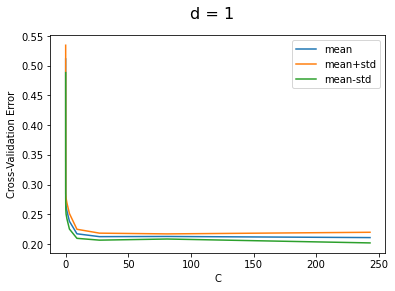

Accuracy = 44.6571% (280/627) (classification)
Accuracy = 48.3254% (303/627) (classification)
Accuracy = 49.9203% (313/627) (classification)
Accuracy = 50.1597% (314/626) (classification)
Accuracy = 51.278% (321/626) (classification)
Accuracy = 44.6571% (280/627) (classification)
Accuracy = 48.3254% (303/627) (classification)
Accuracy = 49.9203% (313/627) (classification)
Accuracy = 50.1597% (314/626) (classification)
Accuracy = 51.278% (321/626) (classification)
Accuracy = 65.0718% (408/627) (classification)
Accuracy = 59.9681% (376/627) (classification)
Accuracy = 59.9681% (376/627) (classification)
Accuracy = 62.1406% (389/626) (classification)
Accuracy = 63.4185% (397/626) (classification)
Accuracy = 72.2488% (453/627) (classification)
Accuracy = 71.2919% (447/627) (classification)
Accuracy = 70.1754% (440/627) (classification)
Accuracy = 70.9265% (444/626) (classification)
Accuracy = 70.2875% (440/626) (classification)
Accuracy = 73.6842% (462/627) (classification)
Accuracy = 71.4

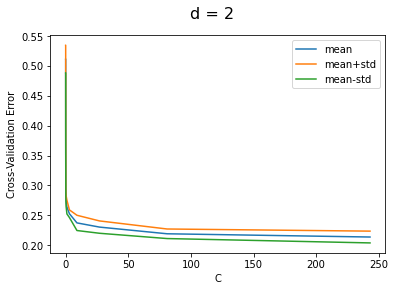

Accuracy = 44.6571% (280/627) (classification)
Accuracy = 48.3254% (303/627) (classification)
Accuracy = 49.9203% (313/627) (classification)
Accuracy = 50.1597% (314/626) (classification)
Accuracy = 51.278% (321/626) (classification)
Accuracy = 44.6571% (280/627) (classification)
Accuracy = 48.3254% (303/627) (classification)
Accuracy = 49.9203% (313/627) (classification)
Accuracy = 50.1597% (314/626) (classification)
Accuracy = 51.278% (321/626) (classification)
Accuracy = 69.2185% (434/627) (classification)
Accuracy = 48.9633% (307/627) (classification)
Accuracy = 51.1962% (321/627) (classification)
Accuracy = 50.9585% (319/626) (classification)
Accuracy = 52.0767% (326/626) (classification)
Accuracy = 63.9553% (401/627) (classification)
Accuracy = 58.3732% (366/627) (classification)
Accuracy = 59.3301% (372/627) (classification)
Accuracy = 60.0639% (376/626) (classification)
Accuracy = 61.9808% (388/626) (classification)
Accuracy = 70.4944% (442/627) (classification)
Accuracy = 67.7

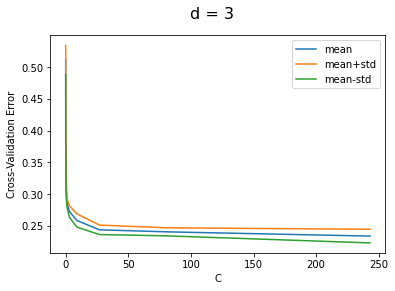

Accuracy = 44.6571% (280/627) (classification)
Accuracy = 48.3254% (303/627) (classification)
Accuracy = 49.9203% (313/627) (classification)
Accuracy = 50.1597% (314/626) (classification)
Accuracy = 51.278% (321/626) (classification)
Accuracy = 44.6571% (280/627) (classification)
Accuracy = 48.3254% (303/627) (classification)
Accuracy = 49.9203% (313/627) (classification)
Accuracy = 50.1597% (314/626) (classification)
Accuracy = 51.278% (321/626) (classification)
Accuracy = 44.6571% (280/627) (classification)
Accuracy = 48.3254% (303/627) (classification)
Accuracy = 49.9203% (313/627) (classification)
Accuracy = 50.1597% (314/626) (classification)
Accuracy = 51.278% (321/626) (classification)
Accuracy = 58.5327% (367/627) (classification)
Accuracy = 50.3987% (316/627) (classification)
Accuracy = 52.1531% (327/627) (classification)
Accuracy = 51.7572% (324/626) (classification)
Accuracy = 52.7157% (330/626) (classification)
Accuracy = 61.882% (388/627) (classification)
Accuracy = 57.735

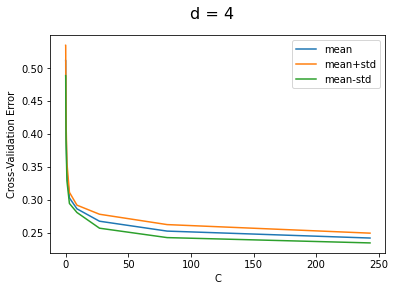

Accuracy = 44.6571% (280/627) (classification)
Accuracy = 48.3254% (303/627) (classification)
Accuracy = 49.9203% (313/627) (classification)
Accuracy = 50.1597% (314/626) (classification)
Accuracy = 51.278% (321/626) (classification)
Accuracy = 44.6571% (280/627) (classification)
Accuracy = 48.3254% (303/627) (classification)
Accuracy = 49.9203% (313/627) (classification)
Accuracy = 50.1597% (314/626) (classification)
Accuracy = 51.278% (321/626) (classification)
Accuracy = 44.6571% (280/627) (classification)
Accuracy = 48.3254% (303/627) (classification)
Accuracy = 49.9203% (313/627) (classification)
Accuracy = 50.1597% (314/626) (classification)
Accuracy = 51.278% (321/626) (classification)
Accuracy = 44.6571% (280/627) (classification)
Accuracy = 48.3254% (303/627) (classification)
Accuracy = 49.9203% (313/627) (classification)
Accuracy = 50.1597% (314/626) (classification)
Accuracy = 51.278% (321/626) (classification)
Accuracy = 57.8947% (363/627) (classification)
Accuracy = 51.196

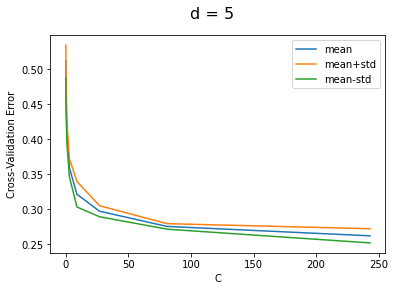

In [10]:
fig_dict = {}
min_mean = 1
for d in d_list:
    fig = plt.figure()
    fig.suptitle('d = '+str(d), fontsize=16)
    fig_x = C_list
    fig_y, fig_yu, fig_yl = [], [], []
    for C in C_list:
        mean, std = cross_val_error(d, C, model_dict, ytr, scaled_xtr)
        if(mean<min_mean):
            min_mean = mean
            C_star, d_star = C, d
        fig_y.append(mean)
        fig_yu.append(mean+std)
        fig_yl.append(mean-std)
    plt.plot(fig_x, fig_y, label='mean')
    plt.plot(fig_x, fig_yu, label='mean+std')
    plt.plot(fig_x, fig_yl, label='mean-std')
    plt.xlabel('C')
    plt.ylabel('Cross-Validation Error')
    plt.legend()
    plt.show()

Optimal C and d

In [11]:
C_star, d_star

(243, 1)

### 8. Plot error and support vectors as function of d

Accuracy = 77.0115% (804/1044) (classification)
Accuracy = 76.2452% (796/1044) (classification)
Accuracy = 77.0115% (804/1044) (classification)
Accuracy = 76.8199% (802/1044) (classification)
Accuracy = 77.3946% (808/1044) (classification)
Accuracy = 80.0638% (502/627) (classification)
Accuracy = 78.9474% (495/627) (classification)
Accuracy = 79.1069% (496/627) (classification)
Accuracy = 79.2332% (496/626) (classification)
Accuracy = 77.3163% (484/626) (classification)
Accuracy = 77.2031% (806/1044) (classification)
Accuracy = 77.0115% (804/1044) (classification)
Accuracy = 77.0115% (804/1044) (classification)
Accuracy = 76.9157% (803/1044) (classification)
Accuracy = 77.7778% (812/1044) (classification)
Accuracy = 80.0638% (502/627) (classification)
Accuracy = 78.4689% (492/627) (classification)
Accuracy = 78.9474% (495/627) (classification)
Accuracy = 78.5942% (492/626) (classification)
Accuracy = 76.9968% (482/626) (classification)
Accuracy = 76.0536% (794/1044) (classification)
Ac

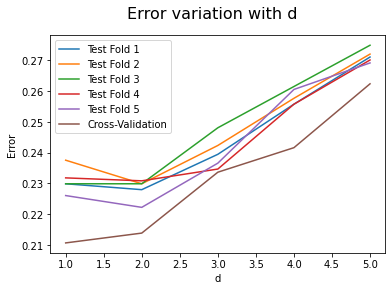

In [12]:
fig = plt.figure()
fig.suptitle('Error variation with d', fontsize=16)
fig_x = d_list
fig_yt1, fig_yt2, fig_yt3, fig_yt4, fig_yt5, fig_ycv = [], [], [], [], [], []
for d in d_list:
    err = test_errors(d, C_star, model_dict, yts, scaled_xts)
    fig_yt1.append(err[0])
    fig_yt2.append(err[1])
    fig_yt3.append(err[2])
    fig_yt4.append(err[3])
    fig_yt5.append(err[4])
    mean, _ = cross_val_error(d, C_star, model_dict, ytr, scaled_xtr)
    fig_ycv.append(mean)
plt.plot(fig_x, fig_yt1, label='Test Fold 1')
plt.plot(fig_x, fig_yt2, label='Test Fold 2')
plt.plot(fig_x, fig_yt3, label='Test Fold 3')
plt.plot(fig_x, fig_yt4, label='Test Fold 4')
plt.plot(fig_x, fig_yt5, label='Test Fold 5')
plt.plot(fig_x, fig_ycv, label='Cross-Validation')
plt.xlabel('d')
plt.ylabel('Error')
plt.legend()
plt.show()

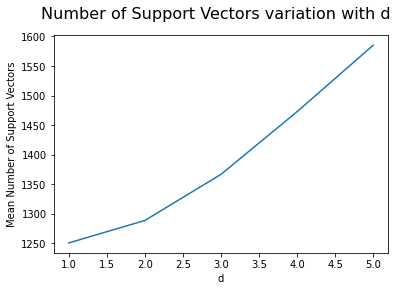

In [17]:
fig = plt.figure()
fig.suptitle('Number of Support Vectors variation with d', fontsize=16)
fig_x = d_list
fig_ysv = []
for d in d_list:
    fig_ysv.append(num_support_vectors(d, C_star, model_dict))
plt.plot(fig_x, fig_ysv)
plt.xlabel('d')
plt.ylabel('Mean Number of Support Vectors')
plt.show()

Find the number of bounded support vectors.

In [32]:
for d in d_list:
    Msv = 0
    for fold in range(1,6):
        m = model_dict[d][C_star][fold]
        num_sv = m.get_nr_sv()
        sv_coef = m.get_sv_coef()
        for i in range(len(sv_coef)):
            Msv += int(sv_coef[i][0] != C_star)
    Msv_avg = Msv*1.0/5
    print(Msv_avg)

629.4
651.8
690.0
741.4
795.6


### 9. Plot train and test errors as function of data folds

Accuracy = 77.0115% (804/1044) (classification)
Accuracy = 76.2452% (796/1044) (classification)
Accuracy = 77.0115% (804/1044) (classification)
Accuracy = 76.8199% (802/1044) (classification)
Accuracy = 77.3946% (808/1044) (classification)
Accuracy = 77.0115% (804/1044) (classification)
Accuracy = 76.2452% (796/1044) (classification)
Accuracy = 77.0115% (804/1044) (classification)
Accuracy = 76.8199% (802/1044) (classification)
Accuracy = 77.3946% (808/1044) (classification)
Accuracy = 77.0115% (804/1044) (classification)
Accuracy = 76.2452% (796/1044) (classification)
Accuracy = 77.0115% (804/1044) (classification)
Accuracy = 76.8199% (802/1044) (classification)
Accuracy = 77.3946% (808/1044) (classification)
Accuracy = 77.0115% (804/1044) (classification)
Accuracy = 76.2452% (796/1044) (classification)
Accuracy = 77.0115% (804/1044) (classification)
Accuracy = 76.8199% (802/1044) (classification)
Accuracy = 77.3946% (808/1044) (classification)
Accuracy = 77.0115% (804/1044) (classifi

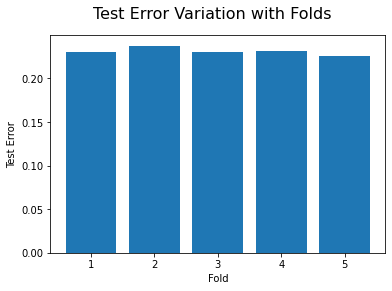

In [14]:
for fold in range(1,6):
    test_err = test_errors(d_star, C_star, model_dict, yts, scaled_xts)
fig = plt.figure()
fig.suptitle('Test Error Variation with Folds', fontsize=16)
fig_x = range(1,6)
plt.bar(fig_x, test_err)
plt.xlabel('Fold')
plt.ylabel('Test Error')
plt.show()

Accuracy = 79.0503% (1981/2506) (classification)
Accuracy = 79.0902% (1982/2506) (classification)
Accuracy = 79.0104% (1980/2506) (classification)
Accuracy = 79.0586% (1982/2507) (classification)
Accuracy = 79.4575% (1992/2507) (classification)
Accuracy = 79.0503% (1981/2506) (classification)
Accuracy = 79.0902% (1982/2506) (classification)
Accuracy = 79.0104% (1980/2506) (classification)
Accuracy = 79.0586% (1982/2507) (classification)
Accuracy = 79.4575% (1992/2507) (classification)
Accuracy = 79.0503% (1981/2506) (classification)
Accuracy = 79.0902% (1982/2506) (classification)
Accuracy = 79.0104% (1980/2506) (classification)
Accuracy = 79.0586% (1982/2507) (classification)
Accuracy = 79.4575% (1992/2507) (classification)
Accuracy = 79.0503% (1981/2506) (classification)
Accuracy = 79.0902% (1982/2506) (classification)
Accuracy = 79.0104% (1980/2506) (classification)
Accuracy = 79.0586% (1982/2507) (classification)
Accuracy = 79.4575% (1992/2507) (classification)
Accuracy = 79.0503% 

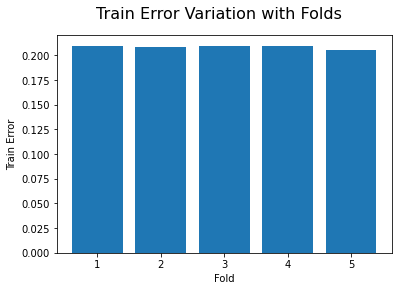

In [15]:
for fold in range(1,6):
    train_err = train_errors(d_star, C_star, model_dict, ytr, scaled_xtr)
fig = plt.figure()
fig.suptitle('Train Error Variation with Folds', fontsize=16)
fig_x = range(1,6)
plt.bar(fig_x, train_err)
plt.xlabel('Fold')
plt.ylabel('Train Error')
plt.show()

### 10. Sparse SVM Training

In [46]:
cv_err = []
test_err = []

In this part of the code, I am using sklearn sgdclassifier to take leverage of the implemented sgd routine for SVMs already available in the scikit-learn library. I have made sure to correctly translate the parameters from libsvm to sklearn.

In [48]:
arr_xtr = scaled_xtr.toarray()
arr_xts = scaled_xts.toarray()
for d in d_list:
    err_cv, err_test = [], []
    ps = PolynomialCountSketch(degree=d, random_state=1)
    arr_xtr = ps.fit_transform(arr_xtr)
    arr_xts = ps.fit_transform(arr_xts)
    for train_idx, val_idx in kf.split(X=arr_xtr, y=ytr):
        clf = SGDClassifier(penalty='l1', alpha=(1.0/243))
        clf.fit(arr_xtr[train_idx], ytr[train_idx])
        err_cv.append(1-clf.score(arr_xtr[val_idx], ytr[val_idx]))
        err_test.append(1-clf.score(arr_xts, yts))
    cv_err.append(sum(err_cv)*1.0/len(err_cv))
    test_err.append(sum(err_test)*1.0/len(err_test))

/scratch/ab9738/fml/env_fml/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/scratch/ab9738/fml/env_fml/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/scratch/ab9738/fml/env_fml/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/scratch/ab9738/fml/env_fml/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


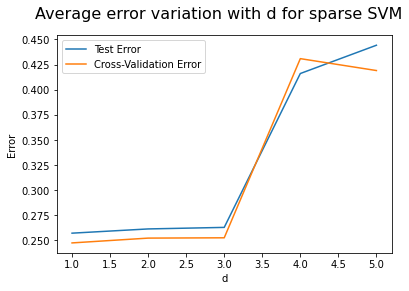

In [49]:
fig = plt.figure()
fig.suptitle('Average error variation with d for sparse SVM', fontsize=16)
fig_x = d_list
fig_ycv, fig_yt = cv_err, test_err
plt.plot(fig_x, fig_yt, label='Test Error')
plt.plot(fig_x, fig_ycv, label='Cross-Validation Error')
plt.xlabel('d')
plt.ylabel('Error')
plt.legend()
plt.show()